## 6.4 Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Hypothesis Testing
     3.1 Price vs Nnumber of Bedroooms
         3.1a. Data prep for regression analysis 
         3.1b. Regression analysis
     3.2 Price vs Living Space
         3.2a. Data prep for regression analysis 
         3.2b. Regression analysis
     3.3 Price vs Living Space of 15 Closest Homes
         3.2a. Data prep for regression analysis 
         3.2b. Regression analysis


### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Define path

path = r'C:\Users\shyro\OneDrive\Documents\2. Data Immersion\Achievement 6 - Advanced Analytics & Dashboard Design\King County House Sales'

In [4]:
# Import data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_revised_date.csv'))

### 2. Data cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year',
       'month'],
      dtype='object')

In [10]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [12]:
# Rename the columns in the same way as in Exercise 6.2.

df.rename(columns = {'Unnamed: 0' : 'No'}, inplace = True)

In [13]:
df.head()

,No,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


##### Missing values

In [14]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

No               0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
dtype: int64

##### Duplicates check

In [15]:
dups = df.duplicated()

In [16]:
dups.shape # No dups

(21599,)

##### Extreme values checks

C:\Users\shyro\AppData\Local\Temp\ipykernel_21620\1384554536.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=25) # Shows extreme values


<Axes: xlabel='price', ylabel='Density'>

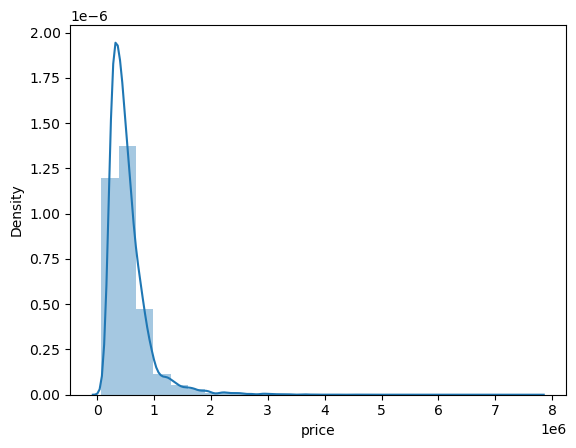

In [17]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [18]:
df['price'].mean() # Check the mean

540255.757118385

In [19]:
df['price'].median() # Check the median

450000.0

In [20]:
df['price'].max() # Check the max

7700000.0

### 3. Hypothesis Testing

#### 3.1 Price vs number of bathrooms

##### 3.1a. Data prep for regression analysis 

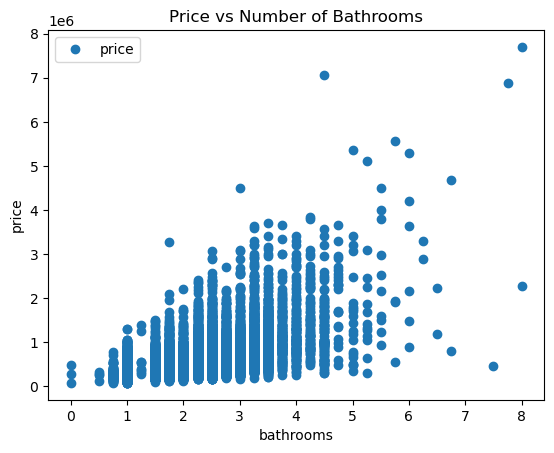

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'bathrooms', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Number of Bathrooms')  
plt.xlabel('bathrooms')  
plt.ylabel('price')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['bathrooms'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [23]:
X

array([[1.  ],
       [2.25],
       [1.  ],
       ...,
       [0.75],
       [2.5 ],
       [0.75]])

In [24]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### 3.1b. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

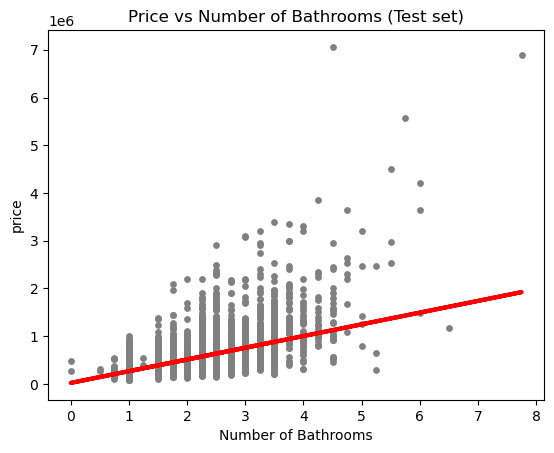

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of Bathrooms (Test set)')
plot_test.xlabel('Number of Bathrooms')
plot_test.ylabel('price')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[245475.83828934]]
Mean squared error:  102457168862.88164
R2 score:  0.28115776884701593


In [32]:
y_predicted

array([[880023.8390982 ],
       [634548.00080886],
       [266334.24337486],
       ...,
       [634548.00080886],
       [450441.12209186],
       [266334.24337486]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000.0,8.800238e+05
1,335000.0,6.345480e+05
2,192500.0,2.663342e+05
3,179900.0,4.504411e+05
4,185000.0,2.663342e+05
5,305000.0,6.345480e+05
6,515500.0,6.959170e+05
7,163000.0,4.504411e+05
8,447055.0,6.345480e+05
9,545000.0,6.345480e+05


##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[245475.83828934]]
Mean squared error:  95590143895.16043
R2 score:  0.274214563412433


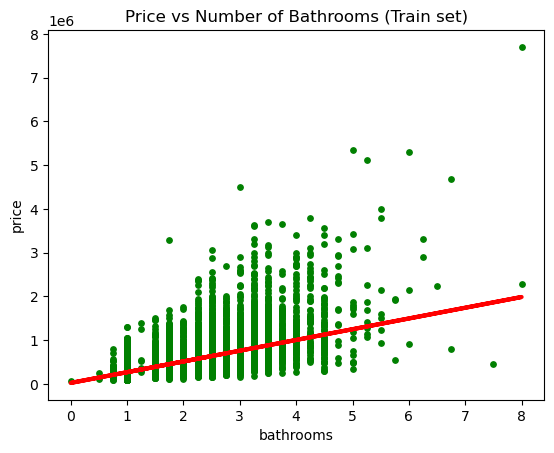

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Number of Bathrooms (Train set)')
plot_test.xlabel('bathrooms')
plot_test.ylabel('price')
plot_test.show()

#### 3.2 Price vs sqft_living

##### 3.2a. Data prep for regression analysis 

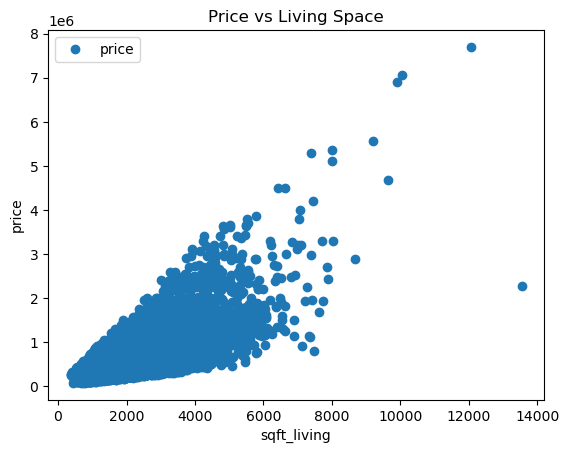

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Living Space')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [50]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [51]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### 3.2b Regression analysis

In [53]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

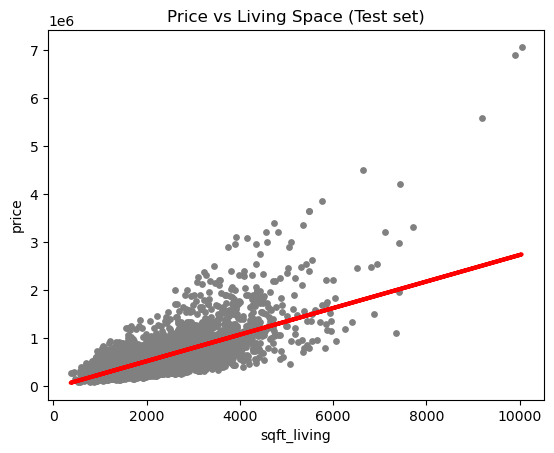

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Living Space (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[276.29362366]]
Mean squared error:  71340234001.29317
R2 score:  0.4994750142950296


In [59]:
y_predicted

array([[1058787.64902611],
       [ 448178.74072717],
       [ 227143.84179543],
       ...,
       [ 470282.23062035],
       [ 625006.65987257],
       [ 221617.96932214]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000.0,1.058788e+06
1,335000.0,4.481787e+05
2,192500.0,2.271438e+05
3,179900.0,3.045061e+05
4,185000.0,3.459501e+05
5,305000.0,5.255410e+05
6,515500.0,7.465759e+05
7,163000.0,3.210837e+05
8,447055.0,6.410317e+05
9,545000.0,6.194808e+05


##### Compare how the regression fits the training set

In [61]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [62]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[276.29362366]]
Mean squared error:  67252990257.41579
R2 score:  0.48936952172253045


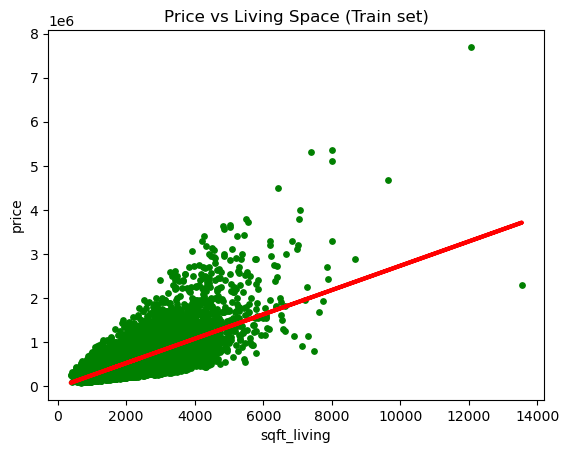

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Living Space (Train set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

#### 3.3 Price vs sqft_living15

##### 3.3a. Data prep for regression analysis 

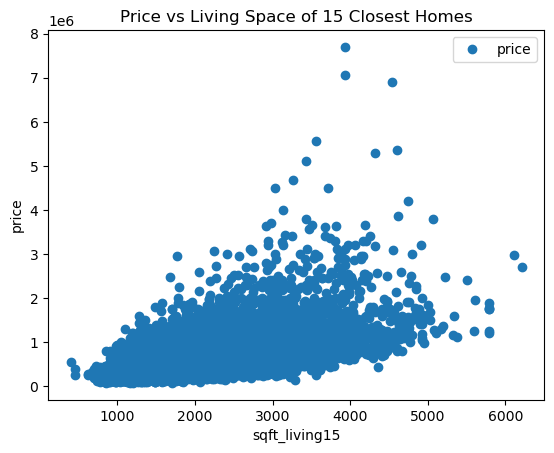

In [65]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living15', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price vs Living Space of 15 Closest Homes')  
plt.xlabel('sqft_living15')  
plt.ylabel('price')  
plt.show()

In [66]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living15'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [67]:
X

array([[1340],
       [1690],
       [2720],
       ...,
       [1020],
       [1410],
       [1020]], dtype=int64)

In [68]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [69]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

##### 3.2b Regression analysis

In [70]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [71]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

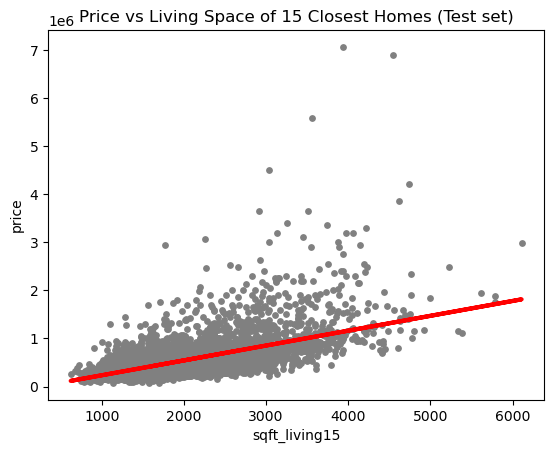

In [73]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Living Space of 15 Closest Homes (Test set)')
plot_test.xlabel('sqft_living15')
plot_test.ylabel('price')
plot_test.show()

In [74]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [75]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[308.67160312]]
Mean squared error:  93060926983.92545
R2 score:  0.34708205263980163


In [76]:
y_predicted

array([[740995.59849406],
       [438497.42744087],
       [487884.88393935],
       ...,
       [540359.05646898],
       [663827.69771518],
       [426150.56331625]])

In [77]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,650000.0,7.409956e+05
1,335000.0,4.384974e+05
2,192500.0,4.878849e+05
3,179900.0,4.045436e+05
4,185000.0,3.520694e+05
5,305000.0,6.329605e+05
6,515500.0,7.996432e+05
7,163000.0,3.304624e+05
8,447055.0,7.950131e+05
9,545000.0,5.804864e+05


##### Compare how the regression fits the training set

In [78]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [79]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [80]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[308.67160312]]
Mean squared error:  86878802717.51126
R2 score:  0.34035699507168116


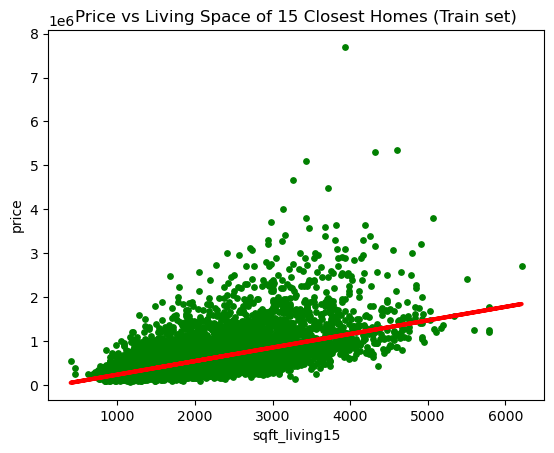

In [81]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Living Space of 15 Closest Homes (Train set)')
plot_test.xlabel('sqft_living15')
plot_test.ylabel('price')
plot_test.show()

#### All of these home characteristics are a poor fit when it comes to determining the home sale prices. It is possible that a combination of different features determine the home price sales amount. 